In [1]:
!pip install youtube-comment-downloader
from youtube_comment_downloader import YoutubeCommentDownloader
import pandas as pd

downloader = YoutubeCommentDownloader()
comments = downloader.get_comments_from_url('https://www.youtube.com/watch?v=PtDG6--j3-I')

all_comments = []
for comment in comments:
    all_comments.append(comment)
    if len(all_comments) >= 1000:  # Limit to 1000 comments
        break

df = pd.DataFrame(all_comments)
df.to_csv('CBUM-comment.csv', index=False)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 6.2 MB/s eta 0:00:00


# Datatransformation

In [2]:
#Libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import os

# Import functions for data preprocessing & data preparation
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer, LancasterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.corpus import stopwords
from nltk.corpus import wordnet
import string
from string import punctuation
import nltk
import re
!pip install twython


/opt/conda/lib/python3.10/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [3]:
data = pd.read_csv('/kaggle/working/CBUM-comment.csv')
print(data.columns)

Index(['cid', 'text', 'time', 'author', 'channel', 'votes', 'replies', 'photo',
       'heart', 'reply', 'time_parsed'],
      dtype='object')


In [4]:
data = pd.read_csv('/kaggle/working/CBUM-comment.csv')

# If you want to keep only the 'text' column (which contains the comments):
data1 = data[['text']]

# Or if you want to drop specific columns and keep the rest:
data1 = data.drop(['cid', 'time', 'author', 'channel','votes','replies', 'photo', 'heart', 'reply', 'time_parsed'], axis=1)

# Display the first few rows of the resulting DataFrame
print(data1.head())

                                                text
0  💪Check out my training on the new app!:  https...
1  This is the way to do it.  Go out on top.  Rid...
2  Its absolutely the right move, competeing at t...
3                              Jessy just appeared 😂
4                                           😍😍😍😍😍😍😍😍


In [5]:
data1.sample(6)

,text
341,2:15 the next generation is all ready📈📈
520,LET's go OPEN!!!!!!
979,"You can't say, he is just 29 and still has a l..."
38,good
270,Next video please CBUM 🇨🇦❤️🇱🇰
432,I have been waiting impatiently for this show ...


# Data labelling

In [6]:
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

nltk.download('vader_lexicon')
sentiments = SentimentIntensityAnalyzer()

data1["Positive"] = [sentiments.polarity_scores(i)["pos"] for i in data1["text"]]
data1["Negative"] = [sentiments.polarity_scores(i)["neg"] for i in data1["text"]]
data1["Neutral"] = [sentiments.polarity_scores(i)["neu"] for i in data1["text"]]
data1['Compound'] = [sentiments.polarity_scores(i)["compound"] for i in data1["text"]]

score = data1["Compound"].values
sentiment = []
for i in score:
    if i >= 0.05:
        sentiment.append('Positive')
    elif i <= -0.05:
        sentiment.append('Negative')
    else:
        sentiment.append('Neutral')

data1["Sentiment"] = sentiment
print(data1.head())

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /usr/share/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
                                                text  Positive  Negative  \
0  💪Check out my training on the new app!:  https...     0.000     0.000   
1  This is the way to do it.  Go out on top.  Rid...     0.274     0.000   
2  Its absolutely the right move, competeing at t...     0.211     0.023   
3                              Jessy just appeared 😂     0.000     0.000   
4                                           😍😍😍😍😍😍😍😍     0.000     0.000   

   Neutral  Compound Sentiment  
0    1.000    0.0000   Neutral  
1    0.726    0.8074  Positive  
2    0.766    0.9454  Positive  
3    1.000    0.0000   Neutral  
4    1.000    0.0000   Neutral  


In [7]:
data1.sample(5)

,text,Positive,Negative,Neutral,Compound,Sentiment
547,❤ love from India 🥺,0.677,0.000,0.323,0.6369,Positive
188,Goat😊,0.000,0.000,1.000,0.0000,Neutral
605,Legend,0.000,0.000,1.000,0.0000,Neutral
948,Are you crying too?,0.000,0.508,0.492,-0.4767,Negative
436,i love you cbum i hope we can train one day ❤,0.504,0.000,0.496,0.7964,Positive


# Final data

In [8]:
data2=data1.drop(['Positive','Negative','Neutral','Compound'],axis=1)
data2.head()

,text,Sentiment
0,💪Check out my training on the new app!: https...,Neutral
1,This is the way to do it. Go out on top. Rid...,Positive
2,"Its absolutely the right move, competeing at t...",Positive
3,Jessy just appeared 😂,Neutral
4,😍😍😍😍😍😍😍😍,Neutral


In [9]:
data2.sample(5)

,text,Sentiment
981,⭕️⭕️⭕️⭕️⭕️⭕️,Neutral
943,Am I the only one who cheers and applauds any ...,Positive
118,Congrats bumstead,Positive
544,"Congratulations Sir, youve given the entire ge...",Positive
41,Urs with the kiss on the cheek lol,Positive


In [10]:
sentiment_counts = data2['Sentiment'].value_counts()
print(sentiment_counts)

Sentiment
Positive    502
Neutral     416
Negative     82
Name: count, dtype: int64


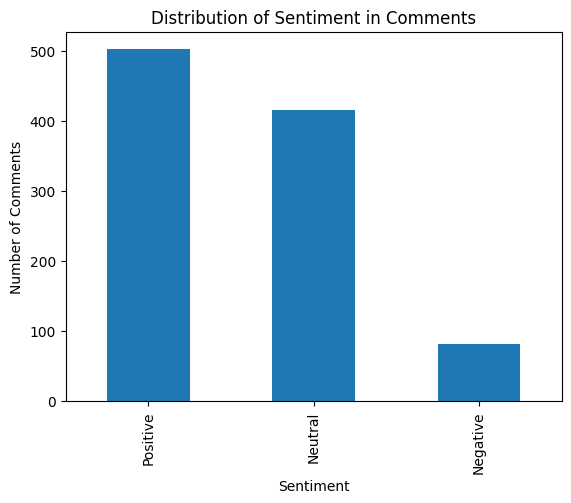

In [11]:
import matplotlib.pyplot as plt

sentiment_counts.plot(kind='bar')
plt.title('Distribution of Sentiment in Comments')
plt.xlabel('Sentiment')
plt.ylabel('Number of Comments')
plt.show()

# Data transformation

In [12]:
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, LancasterStemmer, WordNetLemmatizer
from nltk.stem.snowball import SnowballStemmer

# Download necessary NLTK data
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

# Initialize the tools
stop_words = stopwords.words('english')
porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer() 
snowball_stemmer = SnowballStemmer(language="english")
lzr = WordNetLemmatizer()

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [13]:
data2.sample(5)

,text,Sentiment
260,CBUM The leyend 💎,Neutral
677,That 20 min youtube vid should easily enter th...,Positive
803,CBUM please brake Ronnie Coleman record 🙇🙇 and...,Positive
214,thanks cbum for the immense motivation you hav...,Positive
636,"Nice, thank you",Positive


In [14]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('stopwords')

# Initialize stopwords
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    
    # Remove new line characters
    text = re.sub(r'\n', ' ', text)
    
    # Remove punctuations and special characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    
    # Remove multiple spaces
    text = re.sub(r'\s+', ' ', text).strip()
    
    # Tokenize
    tokens = word_tokenize(text)
    
    # Remove stopwords
    processed_tokens = [word for word in tokens if word not in stop_words]
    
    # Join tokens back into string
    return ' '.join(processed_tokens)

# Apply the preprocessing
data_copy = data2.copy()
data_copy['processed_text'] = data_copy['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /usr/share/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [15]:
print(data_copy[['text', 'processed_text', 'Sentiment']].head())

                                                text  \
0  💪Check out my training on the new app!:  https...   
1  This is the way to do it.  Go out on top.  Rid...   
2  Its absolutely the right move, competeing at t...   
3                              Jessy just appeared 😂   
4                                           😍😍😍😍😍😍😍😍   

                                      processed_text Sentiment  
0           check training new app httpswwwstndrdapp   Neutral  
1  way go top ride sunset dont trade longevity ta...  Positive  
2  absolutely right move competeing level living ...  Positive  
3                                     jessy appeared   Neutral  
4                                                      Neutral  


In [16]:
data_copy['Sentiment'].value_counts()

Sentiment
Positive    502
Neutral     416
Negative     82
Name: count, dtype: int64

In [17]:
data_copy.isnull().sum()

text              0
Sentiment         0
processed_text    0
dtype: int64

In [18]:
# le = LabelEncoder()
# data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data_copy['Sentiment'] = le.fit_transform(data_copy['Sentiment'])

In [19]:
# Print the first few rows to see the encoded sentiments
print(data_copy[['processed_text', 'Sentiment']].head())

# Check the unique values in the encoded Sentiment column
print("\nUnique encoded sentiment values:")
print(data_copy['Sentiment'].unique())

# Print the mapping of original labels to encoded values
print("\nEncoding mapping:")
for i, label in enumerate(le.classes_):
    print(f"{label}: {i}")

# Count the occurrences of each sentiment
print("\nSentiment value counts:")
print(data_copy['Sentiment'].value_counts())

                                      processed_text  Sentiment
0           check training new app httpswwwstndrdapp          1
1  way go top ride sunset dont trade longevity ta...          2
2  absolutely right move competeing level living ...          2
3                                     jessy appeared          1
4                                                             1

Unique encoded sentiment values:
[1 2 0]

Encoding mapping:
Negative: 0
Neutral: 1
Positive: 2

Sentiment value counts:
Sentiment
2    502
1    416
0     82
Name: count, dtype: int64


In [20]:
import gensim
from gensim.models import LdaModel
from gensim.corpora import Dictionary
import spacy

# Load spaCy model
nlp = spacy.load("en_core_web_sm")

# Create a list of preprocessed texts
texts = data_copy['processed_text'].tolist()

# Tokenize each text (split into individual words)
tokenized_texts = []
for text in texts:
  doc = nlp(text)
  tokens = [token.text for token in doc if token.is_alpha]  # Extract only alphanumeric tokens
  tokenized_texts.append(tokens)

# Create a dictionary and corpus
dictionary = Dictionary(tokenized_texts)
corpus = [dictionary.doc2bow(text) for text in tokenized_texts]

# Train LDA model
lda_model = LdaModel(corpus, num_topics=5, id2word=dictionary)

# Print topics
print(lda_model.print_topics())



[(0, '0.027*"chris" + 0.012*"nt" + 0.010*"legend" + 0.009*"best" + 0.009*"i" + 0.009*"one" + 0.008*"life" + 0.008*"time" + 0.008*"man" + 0.008*"family"'), (1, '0.018*"goat" + 0.015*"chris" + 0.013*"nt" + 0.011*"champ" + 0.010*"cbum" + 0.009*"congrats" + 0.007*"well" + 0.007*"see" + 0.007*"bro" + 0.006*"thank"'), (2, '0.022*"cbum" + 0.017*"man" + 0.014*"love" + 0.012*"congrats" + 0.011*"you" + 0.008*"re" + 0.007*"great" + 0.007*"s" + 0.006*"retirement" + 0.006*"chris"'), (3, '0.021*"legend" + 0.015*"chris" + 0.013*"thank" + 0.012*"love" + 0.008*"like" + 0.007*"years" + 0.007*"man" + 0.006*"next" + 0.006*"enjoy" + 0.006*"bodybuilding"'), (4, '0.015*"video" + 0.010*"like" + 0.010*"i" + 0.009*"cbum" + 0.009*"chris" + 0.008*"bodybuilding" + 0.008*"thank" + 0.007*"m" + 0.007*"legend" + 0.006*"everything"')]


In [21]:
import pyLDAvis
import pyLDAvis.gensim

# Assuming you have your LDA model and corpus defined
lda_model = lda_model
corpus = corpus
dictionary = dictionary

# Create visualization data
vis = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)

# Display the visualization
pyLDAvis.display(vis)

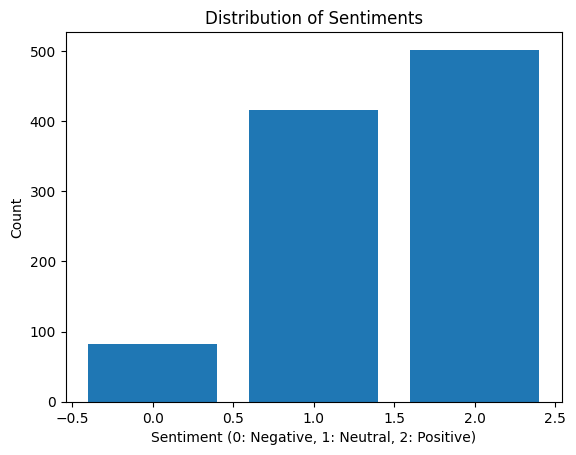

In [22]:
import matplotlib.pyplot as plt

sentiment_counts = data_copy['Sentiment'].value_counts().sort_index()
plt.bar(sentiment_counts.index, sentiment_counts.values)
plt.title('Distribution of Sentiments')
plt.xlabel('Sentiment (0: Negative, 1: Neutral, 2: Positive)')
plt.ylabel('Count')
plt.show()

In [23]:
data_copy.processed_text

0               check training new app httpswwwstndrdapp
1      way go top ride sunset dont trade longevity ta...
2      absolutely right move competeing level living ...
3                                         jessy appeared
4                                                       
                             ...                        
995                                                 goat
996                                                     
997    arnold pumping iron era chris bring back honor...
998                              beautiful little family
999                                    im crying raining
Name: processed_text, Length: 1000, dtype: object

In [24]:
processed_data = {
    'Sentence':data_copy.processed_text,
    'Sentiment':data_copy['Sentiment']
}

processed_data = pd.DataFrame(processed_data)
processed_data.head()

,Sentence,Sentiment
0,check training new app httpswwwstndrdapp,1
1,way go top ride sunset dont trade longevity ta...,2
2,absolutely right move competeing level living ...,2
3,jessy appeared,1
4,,1


In [25]:
processed_data['Sentiment'].value_counts()

Sentiment
2    502
1    416
0     82
Name: count, dtype: int64

In [26]:
df_neutral = processed_data[(processed_data['Sentiment']==1)] 
df_negative = processed_data[(processed_data['Sentiment']==0)]
df_positive = processed_data[(processed_data['Sentiment']==2)]

# upsample minority classes
df_negative_upsampled = resample(df_negative, 
                                 replace=True,    
                                 n_samples= 205, 
                                 random_state=42)  

df_neutral_upsampled = resample(df_neutral, 
                                 replace=True,    
                                 n_samples= 205, 
                                 random_state=42)  


# Concatenate the upsampled dataframes with the neutral dataframe
final_data = pd.concat([df_negative_upsampled,df_neutral_upsampled,df_positive])

In [27]:
final_data['Sentiment'].value_counts()

Sentiment
2    502
0    205
1    205
Name: count, dtype: int64

In [28]:
corpus = []
for sentence in final_data['Sentence']:
    corpus.append(sentence)
corpus[0:5]

['yo calvin man cooked ever living fuck video',
 'even though knew happened still cried watching',
 'shi made cry',
 'miss chris',
 'crazy one came close chriss physique']

In [29]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500)
X = cv.fit_transform(corpus).toarray()
y = final_data.iloc[:, -1].values

# Machine learning model

In [30]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Models   
#  Selection and Evaluation
models = {
    'Naive Bayes (Gaussian)': GaussianNB(),
    'Naive Bayes (Multinomial)': MultinomialNB(),
    'Naive Bayes (Bernoulli)': BernoulliNB(),
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Support Vector Machine': SVC(),}
    

for model_name, model in models.items():
    print(f"Training {model_name} model...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Confusion Matrix for {model_name}:\n", cm)
    print(f"Accuracy for {model_name}: {accuracy:.2f}")
    print(f"Precision for {model_name}: {precision:.2f}")
    print(f"Recall for {model_name}: {recall:.2f}")
    print(f"F1-score for {model_name}: {f1:.2f}\n")

Training Naive Bayes (Gaussian) model...
Confusion Matrix for Naive Bayes (Gaussian):
 [[ 45   0   9]
 [ 10  43  14]
 [  8   8 137]]
Accuracy for Naive Bayes (Gaussian): 0.82
Precision for Naive Bayes (Gaussian): 0.83
Recall for Naive Bayes (Gaussian): 0.82
F1-score for Naive Bayes (Gaussian): 0.82

Training Naive Bayes (Multinomial) model...
Confusion Matrix for Naive Bayes (Multinomial):
 [[ 45   1   8]
 [  7  24  36]
 [  6   8 139]]
Accuracy for Naive Bayes (Multinomial): 0.76
Precision for Naive Bayes (Multinomial): 0.75
Recall for Naive Bayes (Multinomial): 0.76
F1-score for Naive Bayes (Multinomial): 0.74

Training Naive Bayes (Bernoulli) model...
Confusion Matrix for Naive Bayes (Bernoulli):
 [[ 31   5  18]
 [  2  18  47]
 [  1   8 144]]
Accuracy for Naive Bayes (Bernoulli): 0.70
Precision for Naive Bayes (Bernoulli): 0.71
Recall for Naive Bayes (Bernoulli): 0.70
F1-score for Naive Bayes (Bernoulli): 0.67

Training Logistic Regression model...
Confusion Matrix for Logistic Regre

# Deep Learning Models

/opt/conda/lib/python3.10/site-packages/tensorflow/lite/python/util.py:51: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
/opt/conda/lib/python3.10/site-packages/tensorflow/lite/python/util.py:51: DeprecationWarning: jax.xla_computation is deprecated. Please use the AOT APIs; see https://jax.readthedocs.io/en/latest/aot.html. For example, replace xla_computation(f)(*xs) with jit(f).lower(*xs).compiler_ir('hlo'). See CHANGELOG.md for 0.4.30 for more examples.
  from jax import xla_computation as _xla_computation
/opt/conda/lib/python3.10/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)`


Training Simple Neural Network...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 
Results for Simple Neural Network:
Confusion Matrix:
[[ 44   5   6]
 [  1  47  22]
 [  5  10 134]]
Accuracy: 0.82
Precision: 0.82
Recall: 0.82
F1-score: 0.82



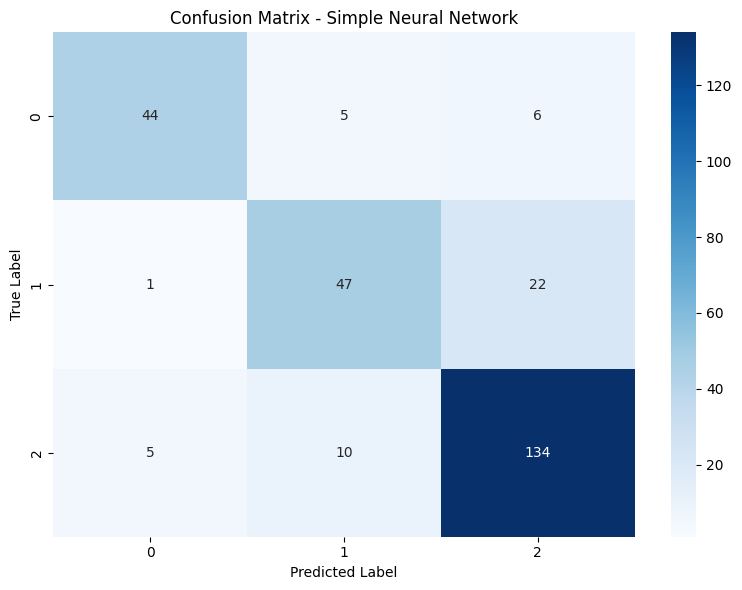

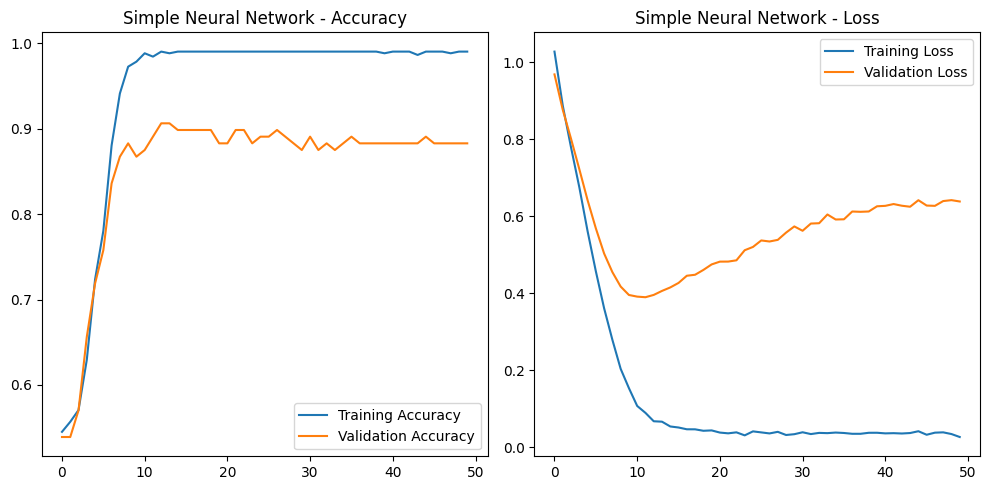


Training Deep Neural Network...
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step
Results for Deep Neural Network:
Confusion Matrix:
[[ 44   4   7]
 [  2  45  23]
 [  6  10 133]]
Accuracy: 0.81
Precision: 0.81
Recall: 0.81
F1-score: 0.81



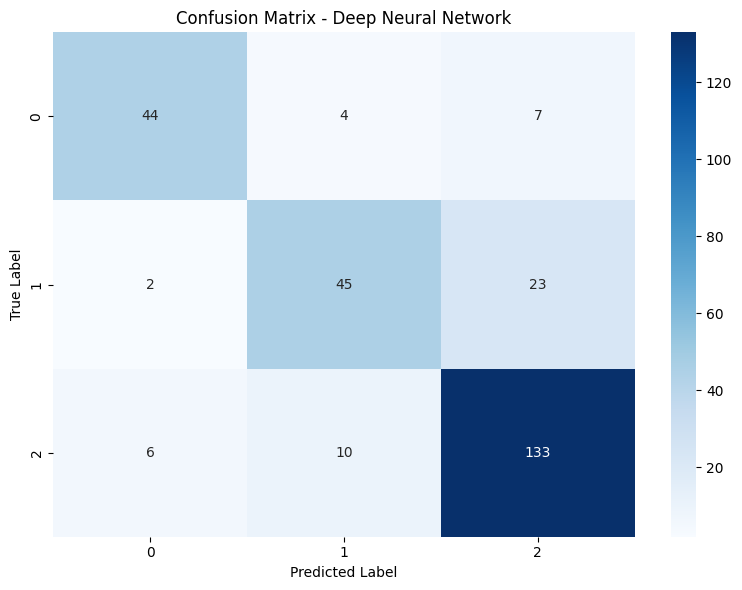

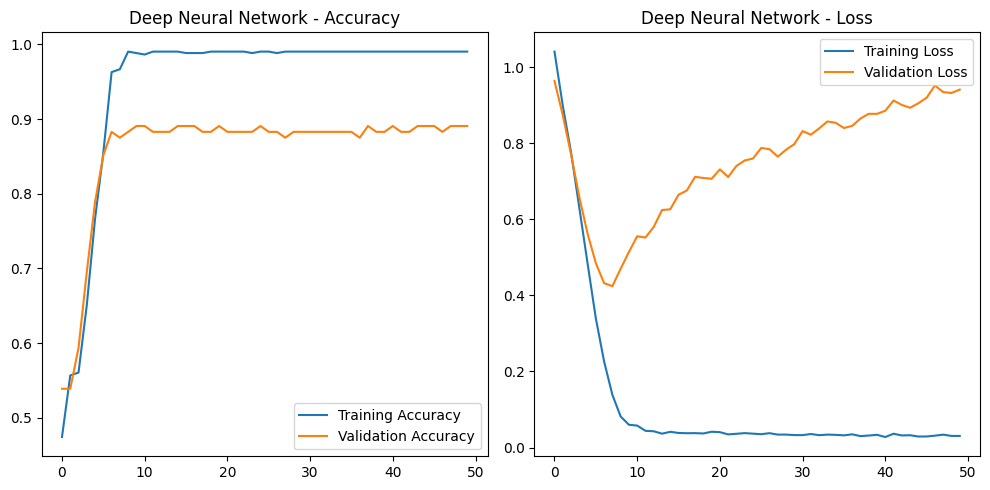

In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM, Embedding
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns

#Define Deep Learning Models
def create_models(input_shape, num_classes):
    models = {
        'Simple Neural Network': Sequential([
            Dense(128, activation='relu', input_shape=(input_shape,)),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.3),
            Dense(num_classes, activation='softmax')
        ]),
        
        'Deep Neural Network': Sequential([
            Dense(256, activation='relu', input_shape=(input_shape,)),
            Dropout(0.4),
            Dense(128, activation='relu'),
            Dropout(0.3),
            Dense(64, activation='relu'),
            Dropout(0.2),
            Dense(num_classes, activation='softmax')
        ])
        
       
    }
    
    return models


# Evaluation Function
def evaluate_model(model, X_test, y_test, model_name):
    # Predict
    y_pred = model.predict(X_test)
    y_pred_classes = np.argmax(y_pred, axis=1)
    y_test_classes = np.argmax(y_test, axis=1)
    
    # Metrics
    cm = confusion_matrix(y_test_classes, y_pred_classes)
    accuracy = accuracy_score(y_test_classes, y_pred_classes)
    precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
    recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
    f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')
    
    # Print Results
    print(f"Results for {model_name}:")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"Precision: {precision:.2f}")
    print(f"Recall: {recall:.2f}")
    print(f"F1-score: {f1:.2f}\n")
    
    # Confusion Matrix Visualization
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.tight_layout()
    plt.show()
    
    return accuracy, precision, recall, f1

# Main Training and Evaluation Function
def train_and_evaluate_models(X, y, test_size=0.3, random_state=42):
    # Prepare train and test sets
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=random_state
    )
    
    # Get input shape and number of classes
    input_shape = X_train.shape[1]
    num_classes = len(np.unique(y))
    
    # One-hot encode labels
    y_train_encoded = tf.keras.utils.to_categorical(y_train)
    y_test_encoded = tf.keras.utils.to_categorical(y_test)
    
    # Create models
    models = create_models(input_shape, num_classes)
    
    # Results tracking
    model_results = {}
    
    # Train and evaluate each model
    for model_name, model in models.items():
        print(f"\nTraining {model_name}...")
        
        # Compile model
        model.compile(
            optimizer=Adam(learning_rate=0.001),
            loss='categorical_crossentropy',
            metrics=['accuracy']
        )
        
        # Train model
        history = model.fit(
            X_train, y_train_encoded, 
            epochs=50, 
            batch_size=32, 
            validation_split=0.2,
            verbose=0
        )
        
        # Evaluate model
        results = evaluate_model(model, X_test, y_test_encoded, model_name)
        model_results[model_name] = results
        
        # Plot training history
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.title(f'{model_name} - Accuracy')
        plt.legend()
        
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.title(f'{model_name} - Loss')
        plt.legend()
        plt.tight_layout()
        plt.show()
    
    return model_results

# Usage
# Assuming X and y are already prepared from previous preprocessing
results = train_and_evaluate_models(X, y)

Training Naive Bayes (Gaussian) model...
Confusion Matrix for Naive Bayes (Gaussian):



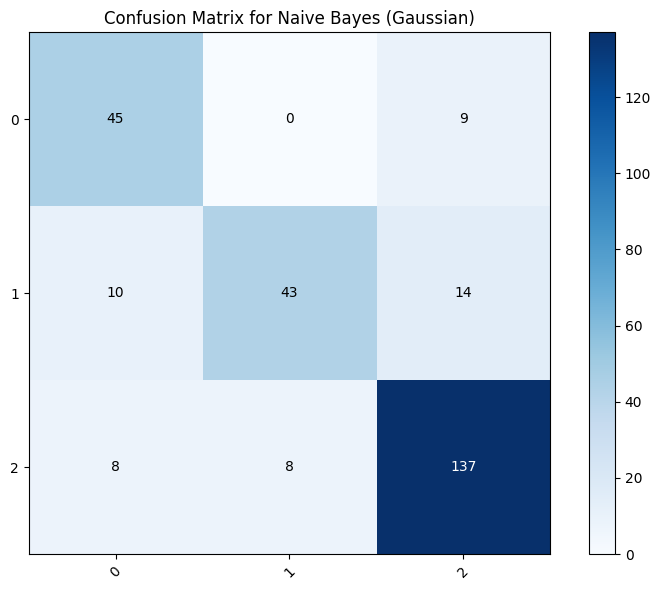

Accuracy for Naive Bayes (Gaussian): 0.82
Precision for Naive Bayes (Gaussian): 0.83
Recall for Naive Bayes (Gaussian): 0.82
F1-score for Naive Bayes (Gaussian): 0.82

Training Naive Bayes (Multinomial) model...
Confusion Matrix for Naive Bayes (Multinomial):



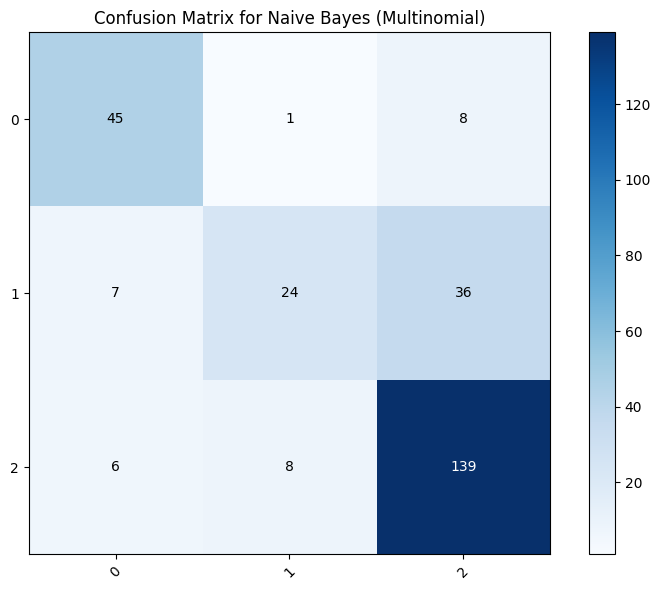

Accuracy for Naive Bayes (Multinomial): 0.76
Precision for Naive Bayes (Multinomial): 0.75
Recall for Naive Bayes (Multinomial): 0.76
F1-score for Naive Bayes (Multinomial): 0.74

Training Naive Bayes (Bernoulli) model...
Confusion Matrix for Naive Bayes (Bernoulli):



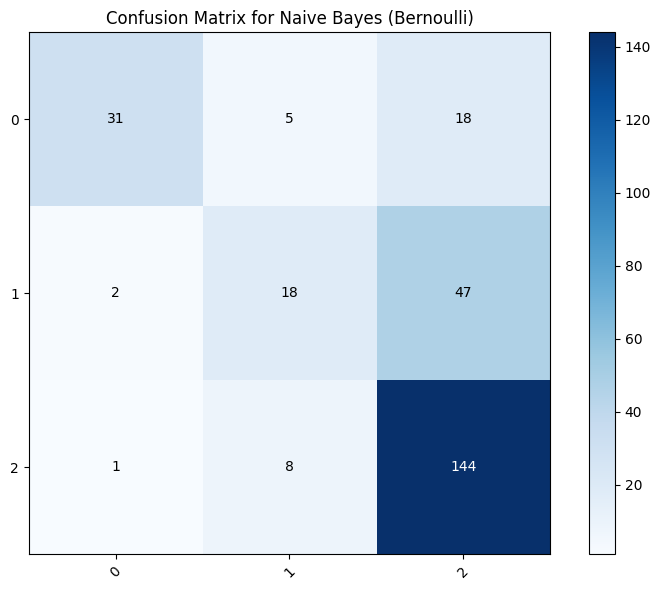

Accuracy for Naive Bayes (Bernoulli): 0.70
Precision for Naive Bayes (Bernoulli): 0.71
Recall for Naive Bayes (Bernoulli): 0.70
F1-score for Naive Bayes (Bernoulli): 0.67

Training Logistic Regression model...
Confusion Matrix for Logistic Regression:



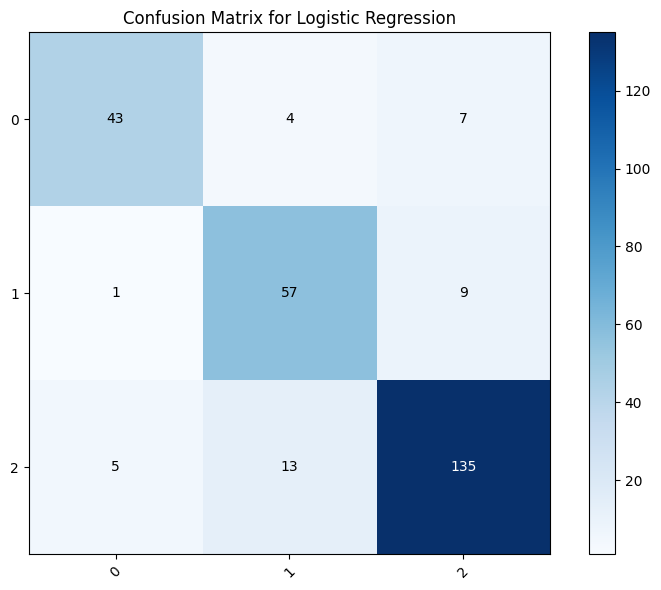

Accuracy for Logistic Regression: 0.86
Precision for Logistic Regression: 0.86
Recall for Logistic Regression: 0.86
F1-score for Logistic Regression: 0.86

Training Support Vector Machine model...
Confusion Matrix for Support Vector Machine:



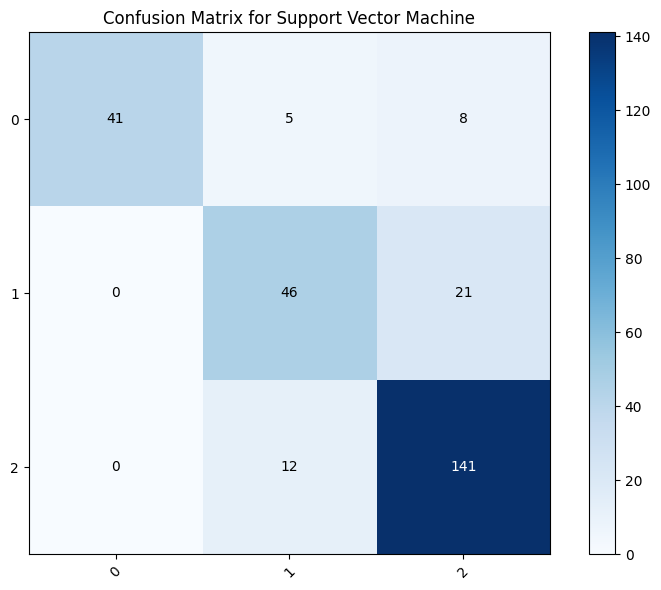

Accuracy for Support Vector Machine: 0.83
Precision for Support Vector Machine: 0.84
Recall for Support Vector Machine: 0.83
F1-score for Support Vector Machine: 0.83



In [32]:
#  Function to plot confusion matrix
def plot_confusion_matrix(cm, model_name):
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, cmap='Blues')
    plt.colorbar()
    classes = [str(x) for x in range(len(cm))]
    plt.xticks(range(len(classes)), classes, rotation=45)
    plt.yticks(range(len(classes)), classes)
    plt.title(f"Confusion Matrix for {model_name}")
    plt.grid(False)

    for i in range(len(cm)):
        for j in range(len(cm[0])):
            plt.text(j, i, cm[i, j], ha='center', va='center', color='white' if cm[i, j] > cm.max() / 2 else 'black')
    plt.tight_layout()
    plt.show()

for model_name, model in models.items():
    print(f"Training {model_name} model...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    cm = confusion_matrix(y_test, y_pred)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    print(f"Confusion Matrix for {model_name}:\n")
    plot_confusion_matrix(cm, model_name)  # Plot the confusion matrix

    print(f"Accuracy for {model_name}: {accuracy:.2f}")
    print(f"Precision for {model_name}: {precision:.2f}")
    print(f"Recall for {model_name}: {recall:.2f}")
    print(f"F1-score for {model_name}: {f1:.2f}\n")
